# Multiple Linear Regression

#### In this project there are 24 records(of 2 years) of two independent features 'interest_rate' and 'unemployment_rate' using which we will predict the dependent variable 'index_price'...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df_index = pd.read_csv('economic_index.csv')

df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [19]:
## dropping unnecessary 'Unnamed', 'year' and 'month' columns...

df_index.drop(columns=["Unnamed: 0" , "year" , "month"],axis=1,inplace=True)
## 'axis=1': This indicates that you are dropping columns (as opposed to rows, which would be axis=0)...

df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [21]:
## checking for null values...
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [22]:
## Data Visualization...
import seaborn as sns

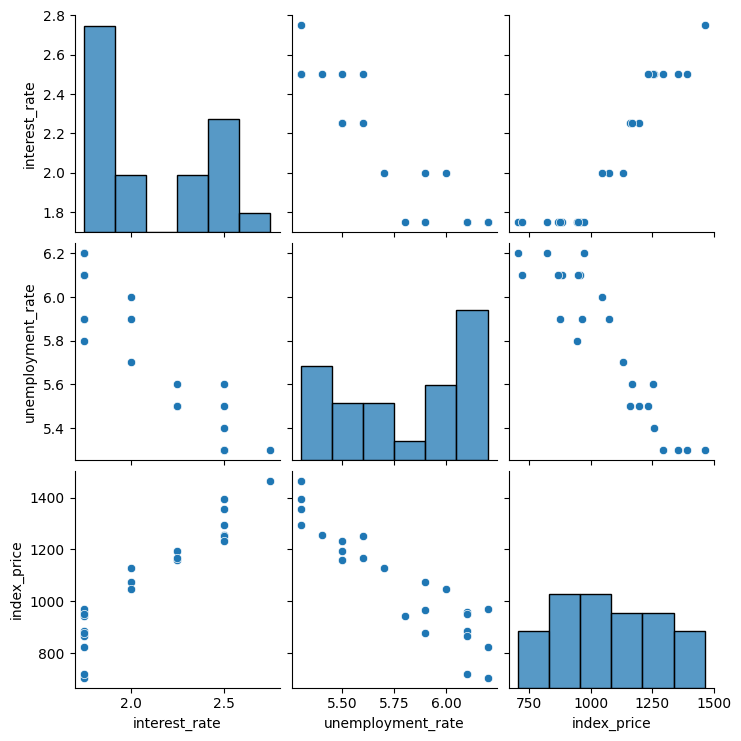

In [24]:
sns.pairplot(df_index)

In [33]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [46]:
## independent and dependent features...

X = df_index[["interest_rate","unemployment_rate"]]
y = df_index["index_price"]

In [53]:
## the independent and dependent features can also be assigned by...

X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [54]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [55]:
## Train test Split...

from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

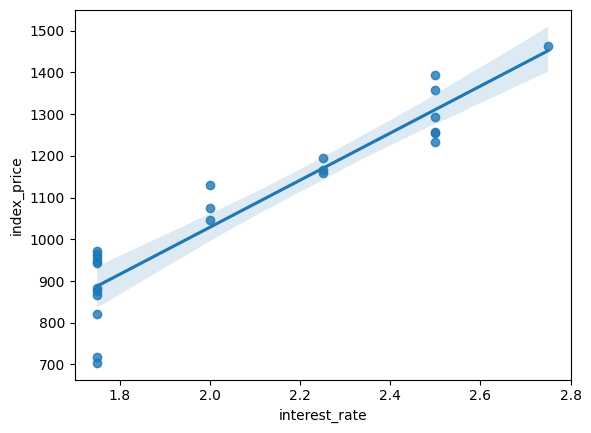

In [63]:
sns.regplot(x = df_index["interest_rate"],y = df_index["index_price"])

####  

A regression plot shows the relationship between two numerical variables along with a best-fit regression line. Here's what you can infer from the plot:

1. Strength of Relationship
Strong Relationship → If the points closely follow the regression line, it indicates a strong correlation.
Weak Relationship → If the points are scattered far from the line, the correlation is weak.
📌 Example:
Salary vs. Experience → If most points lie close to the line, experience strongly predicts salary.
Random Scatter → No clear pattern means a weak or no relationship.

2. Direction of Relationship
Positive Correlation → If the line slopes upward, Y increases as X increases (e.g., more experience → higher salary).
Negative Correlation → If the line slopes downward, Y decreases as X increases (e.g., more hours of TV → lower grades).
📌 Example:
📈 Upward Trend: "Higher study hours → Higher exam scores"
📉 Downward Trend: "Higher temperature → Lower coffee sales"

3. Linearity vs. Non-linearity
If the line fits the data well, the relationship is linear.
If the data curves and the line doesn't fit well, consider a polynomial regression (order=2 or 3).
📌 Example:
🚀 Linear: "Height vs. Weight"
🔄 Non-linear: "Age vs. Salary" (you earn more up to a point, then it stabilizes)

4. Confidence Interval (Shaded Region)
The shaded region represents the confidence interval (default 95%).
Wide CI → More uncertainty in prediction.
Narrow CI → Stronger relationship, more reliable predictions.
📌 Example:
Wide CI: "Stock prices (high fluctuations)"
Narrow CI: "Height vs. Shoe size"

5. Outliers
Outliers are points that are far from the regression line.
These can affect the trend and may need to be handled (e.g., removed or investigated).
📌 Example:
A junior employee with an unusually high salary might be an outlier in "Experience vs. Salary."

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

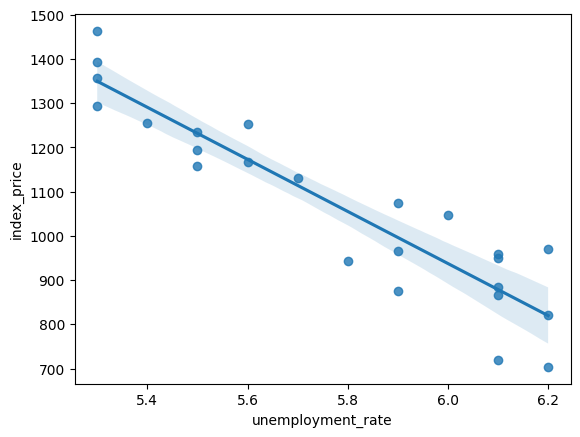

In [82]:
sns.regplot(x = df_index["unemployment_rate"],y = df_index["index_price"])

In [88]:
## Standardization : 

from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [90]:
X_test = scaler.transform(X_test)

X_test

array([[2.25, 5.5 ],
       [1.75, 6.2 ],
       [2.75, 5.3 ],
       [1.75, 6.1 ],
       [2.  , 5.9 ],
       [2.25, 5.6 ]])

In [91]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [92]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## cross validation

from sklearn.model_selection import cross_val_score

## cross_val_score is used to evaluate a machine learning model by performing cross-validation. It splits the dataset into multiple training and testing subsets, trains the model on different splits,
#  and returns performance scores.

In [ ]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

validation_score

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

####
validation_score: This variable will store the results of the cross-validation, which will be an array of scores.

cross_val_score: This function evaluates a score by cross-validation. It splits the dataset into k subsets (or folds), trains the model on k-1 folds, and tests it on the remaining fold. This process is repeated k times, and the scores are averaged.

regression: This is the regression model you are using (e.g., LinearRegression, RandomForestRegressor, etc.). It should be defined and instantiated before this line.

X_train: This is the feature set used for training the model. It should be a 2D array-like structure (e.g., a DataFrame or a NumPy array).

y_train: This is the target variable corresponding to X_train. It should be a 1D array-like structure.

scoring='neg_mean_squared_error': This specifies the scoring metric to evaluate the model. In this case, you are using the negative mean squared error (MSE). The reason for using the negative value is that cross_val_score expects a score function where higher values are better. Since MSE is a loss function (lower is better), it is negated.

cv=5: This specifies the number of folds in the cross-validation. Here, the dataset will be split into 5 parts.

In [103]:
np.mean(validation_score)

np.float64(-5649.115244350762)

In [104]:
## Prediction...

y_predicted = regression.predict(X_test)

y_predicted

array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

In [110]:
## Performance metrics...
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [112]:
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_predicted)

print(mse)
print(mae)
print(rmse)
print(score)

316313.1524014582
549.3922441707887
562.4172404909527
-8.395998348460052


#### Assumptions

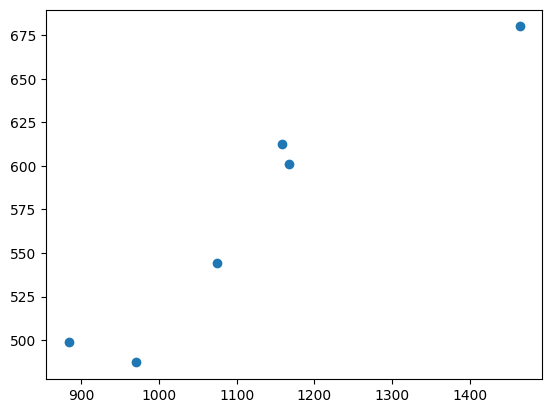

In [114]:
plt.scatter(y_test,y_predicted)

In [116]:
residuals = (y_test - y_predicted)

residuals

8     546.356240
16    483.872630
0     783.968431
18    385.246914
11    530.927293
9     565.981956
Name: index_price, dtype: float64

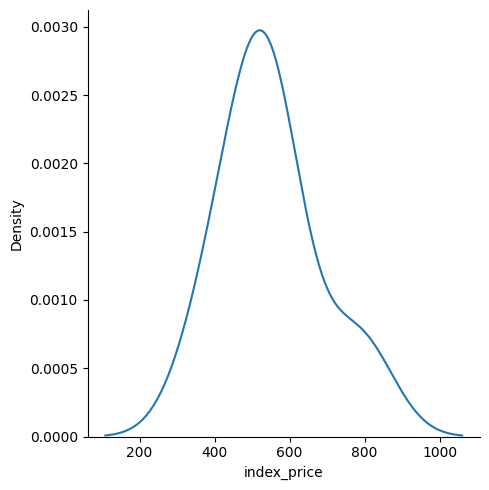

In [119]:
## Plotting this residuals...

sns.displot(residuals,kind='kde')


## the output we get from this is a normal distribution,
## If the residuals (errors) of your model follow a normal distribution, it suggests that:
# 1) The model has captured all patterns in the data.
# 2) The errors are randomly distributed (no bias).
# 3) The model is likely a good fit.

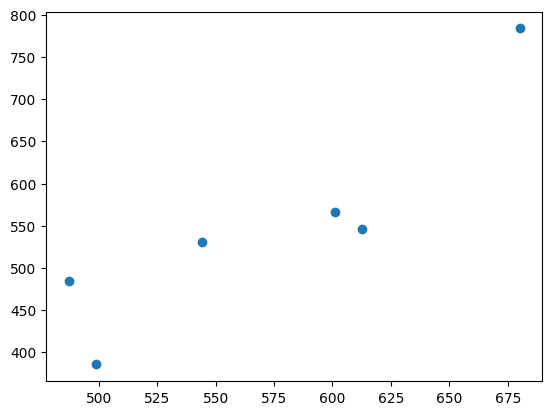

In [120]:
## Scatter plot with respect to predictions and residuals...

plt.scatter(y_predicted,residuals)

In [124]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [125]:
model.summary()

d:\AIML\Python\Py VSCode\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                       0.754
Time:                        23:20:31   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""